In [1]:
import numpy as np
from turabnet.train import train
from turabnet.nn import NeuralNet
from turabnet.layers import Linear, Tanh, Sigmoid
from turabnet.data import BatchIterator
from turabnet.loss import MSE
from turabnet.optim import SGD
from nn_utils import plot_decision_boundary, plot_loss
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

### XOR Gate

|| Inputs | Outputs   ||
| ---- | ---- |
| X | Y | Z | 1-hot |
| 0 | 0 | 0 | [1 0 ]   |
| 1 | 0 | 1 | [0 1 ]   |
| 0 | 1 | 1 | [0 1 ]   |
| 1 | 1 | 0 | [1 0 ]   |

In [2]:
# Binary
inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

# XOR: 1-hot
targets = np.array([
    [1, 0],
    [0, 1],
    [0, 1],
    [1, 0]
])

### Train Model
training a very simple model with minimum number of hidden units to classify correctly. Since XOR gate is not linearly seperable, we can model it using a non-linear model using only four hidden units.

In [3]:
net = NeuralNet([
        Linear(input_size=2, output_size=2),
        Tanh(),
        Linear(input_size=2, output_size=2),
        Sigmoid()
    ])

_losses =  train(net=net, inputs=inputs, targets=targets, num_epochs=1000,
                    iterator=BatchIterator(batch_size=32, shuffle=True),
                    loss=MSE(),
                    optimizer=SGD(lr=0.5),
                    verbose=True, print_every=200)

# Testing
_predictions = net.forward(inputs)


print("\n# Lables")
for x, y_pred, y_true in zip(inputs, _predictions, targets):
    print(f"x: {x} y_pred: {np.argmax(y_pred)} y_true: {np.argmax(y_true)}")

epoch:   1 loss: 0.421
epoch: 200 loss: 0.168
epoch: 400 loss: 0.167
epoch: 600 loss: 0.123
epoch: 800 loss: 0.002
epoch: 1000 loss: 0.001

# Lables
x: [0 0] y_pred: 0 y_true: 0
x: [1 0] y_pred: 1 y_true: 1
x: [0 1] y_pred: 1 y_true: 1
x: [1 1] y_pred: 0 y_true: 0


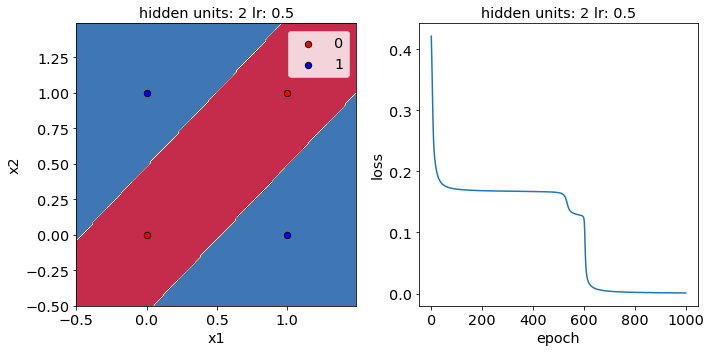

In [4]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plot_decision_boundary(inputs, np.argmax(targets, axis=1), lambda x: np.argmax(net.forward(x), axis=1))
plt.title(f"hidden units: {2} lr: {0.5}")

plt.subplot(1,2,2)
plot_loss(_losses)
plt.title(f"hidden units: {2} lr: {0.5}")
plt.tight_layout()

### Try different learning rate and hidden units
Learning rate and hidden units are hyper parameters. We repeat the training using different learing rates and hidden units.

In [5]:
lr = [0.005, 0.05, 0.5]
h = [2, 3]

cache = []
for _lr in lr:
    for _h in h:
        _net = NeuralNet([
            Linear(input_size=2, output_size=_h),
            Tanh(),
            Linear(input_size=_h, output_size=2),
            Sigmoid()
        ])

        _losses =  train(net=_net, 
                         inputs=inputs, targets=targets, num_epochs=1000,
                         iterator=BatchIterator(batch_size=32, shuffle=True),
                         loss=MSE(),
                         optimizer=SGD(lr=_lr),
                         verbose=False, print_every=200)

        cache.append((_net, _losses, _h, _lr))
print("end of training")

end of training


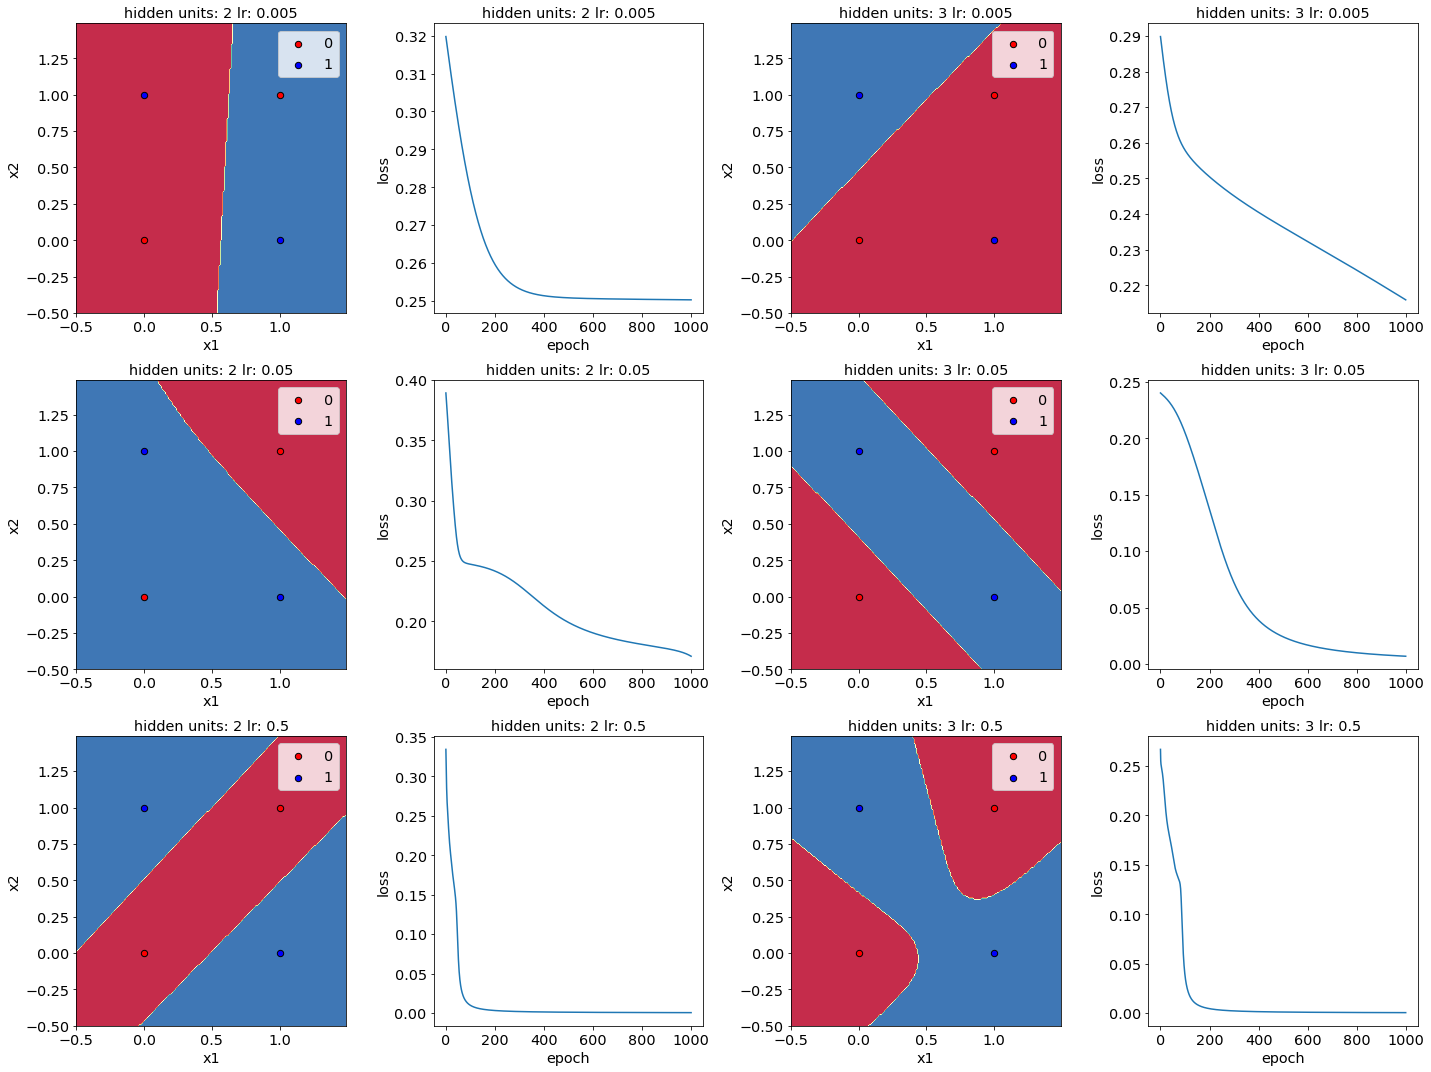

In [6]:
plt.figure(figsize=(20, 15))
for i, (_net, _losses, _h, _lr) in enumerate(cache):
    
    plt.subplot(3,4,2*i+1)
    plot_decision_boundary(inputs, np.argmax(targets, axis=1), lambda x: np.argmax(_net.forward(x), axis=1))
    plt.title(f"hidden units: {_h} lr: {_lr}")
    
    plt.subplot(3, 4, 2*i+ 2)
    plot_loss(_losses)
    plt.title(f"hidden units: {_h} lr: {_lr}")

plt.tight_layout()
plt.show()

### Summary:
- XOR gate outputs are not linearly separable. hence we need non-linear activation function to model the XOR gate
- Since it's outputs are non-linear  and there are four different states in XOR gate, we need at least 4 neurons to model a XOR gate.
- we can see the performance at different learning rate and hidden units. Loss function converges faster at higher learning rate. With more hidden units, the model can learn complex representations.
- as we use random weights to initialize the parameters, the output will differ at each run